# Quantified Self  
## 1. Introduction  
In this Jupyter Notebook I will be exploring some of my own data through a multipstep process. The domain where my data is gathered from is Google Maps. Specifically. I am using my "Semantic Location" Data from the Google Takeout service. I am interested in doing research on this data because I want to see if I have different movement habits (i.e. deviation in distance travelled, amount of time taken, and activity type) during different portions of my life. Last Spring I studied abroad in Madrid, Spain, and I am especially curious to see if my movement patterns were different there than they are in Spokane.  

### About my Data

The dataset is in multiple JSON files which are seperated by month. The tables that I am including from the dataset are all from the "Activity Segment" portion of the JSON file, which is just periods when I moved from one location to another. The attributes of my Activity Segments that I am including are as listed in this chart:

1. **Start Timestamp** : Date and time when I started the activity segment (time zone accounted for)
1. **End Timestamp** : date and time when I ended the activity segment (time zone accounted for)
1. **Start Latitude** : Latitude (formatted with no decimal point) of starting location
1. **Start Longitude** : Longitude (formatted with no decimal point) of starting location
1. **End Latitude** : Latitude (formatted with no decimal point) of ending location
1. **End Longitude** : Longitude (formatted with no decimal point) of ending location
1. **Distance** : distance travelled in meters
1. **Activity** : my method of travel. Activities that are represented in my data are walking, riding the subway, riding the bus, riding in a passenger vehicle (car), riding on a plane, riding a ferry, and riding a train

>Note: This data was all collected by Google Maps through either cell service or GPS. 
  
The data that I decided to pull from the dataset are from the time that I was studying abroad, which is roughly from Jan 21 2022 to May 5 2022, and additionally from last Summer when I was in Spokane, whcih is roughly from May 22 2022 to August 14 2022. This turns out to be about 642 instances for my study abroad data and about 363 instances for my Spokane data. 

### Hypotheses  
One of my hypotheses are that the activity types for the two samples will be vastly different, because I walked a lot more in Spain than I normally do. I also rode the subway and train, and we do not even have a subway in Spokane. I pretty much already know that the activity type for Spokane will be mostly "passenger vehicle." Another hypothesis I have is that my average distance travelled in Spain was larger than in Spokane, but not by a lot. My reasoning is that although I did not have a car to travel large distances, I travelled by train and plane there occasionally. 

My next few hypotheses are only regarding the Spain sample. One hypothesis I have is that the mean distance travelled per day increased from the first half of my study abroad experience to the second half, because I got more comfortable and was probably travelling more. I also have hypotheses about my travel patterns in Spain on weekdays vs weekends. Specifically, I think that mean distance travelled over weekends will be larger than on weekdays, since I had more free time and did not have school. As a side note, I am including Fridays in my weekends because I did not have classes.  I am going to use the kNN algroithm and a Decision Tree to classify data on "weekend" vs "weekday" labels. 

Finally, I am going to use the MeteoStat weather API to test my hypothesis that I did not travel significantly less distance when the temperature was lower. My reasoning is that I had to go to school most days no matter the weather, and also I tried to get the most out of my time there even if it was cold. It also did not get super cold except for when I first arrived there.

### Potential Impacts & Stakeholders  
Mostly these results are to sate my own curiosity. However, a potential impact could be an imporved self awareness of my travel methods. In particular, maybe seeing how much I walked in Spain will motivate me to walk more back in Spokane. Potential stakeholders in this project is really just me and possibly students wanting to study abroad and Spain who want to know the most common modes of transport there.


## 2. Exploratory Data Analysis (EDA)   
Now that I have explained the data a little bit, we can continue to the EDA. This section will consist of loading the data, cleaning the data, making vizualizations, and finallly doing hypothesis tests.
### I. Data Loading  
The first step is to load the data from JSON format into two Pandas dataframes--one for my time studying abroad in Spain, and one for my Summer in Spokane. Overall I need data from January, February, March, April, May, June, July, and August of 2022. 

>Note : I used [`pd.concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to combine the different months. 

In [6]:
import pandas as pd
import utils 
import importlib
importlib.reload(utils) # to reload utils every time

jan_aug_df = utils.load_data()
jan_aug_df

,timelineObjects
0,{'placeVisit': {'location': {'latitudeE7': 477...
1,{'activitySegment': {'startLocation': {'latitu...
2,{'placeVisit': {'location': {'latitudeE7': 477...
3,{'activitySegment': {'startLocation': {'latitu...
4,{'placeVisit': {'location': {'latitudeE7': 478...
...,...
242,{'activitySegment': {'startLocation': {'latitu...
243,{'placeVisit': {'location': {'latitudeE7': 476...
244,{'placeVisit': {'location': {'latitudeE7': 476...
245,{'activitySegment': {'startLocation': {'latitu...


The data from the months I need is now in a dataframe title "timeline Objects". Granted, it is still very ugly, contains information I do not want (such as place visit data) and it is not organized into two dataframes like I want it to be. The next step is to take care of both these things.

### II. Data cleaning
In this section, I will clean my Google Maps Semantic Location Data that I loaded into a dataframe. I will split the dataframe into two dataframes (one for Madrid, one for Spokane) based on the Start Timestamps of each activity segment. I will also convert the Timestamps to Python Datetim objects, which will make them slightly more human readable and a lot easier to work with. 

#### a. Split Into Two Dataframes  
In order to properly split the data into two dataframes, I need to know the datatypes that I will be working with. To do this I can simply print the `type()` of one of the instances in my "timeline Objects" dataframe.

In [641]:
print(type(jan_aug_df["timelineObjects"].iloc[0]))

<class 'dict'>


It looks like the data is in dictionary format, which is unsurprising because it comes in JSON format. The next step will be to parse through the dataframe, go into each activity segment while ignoring the place visits, and grab all of the data for each activity segment that has a Start Timestamp within the range of dates I want. To get the index of the data I need, I will print out activity segments from the first and last day of my range. I will then pick the first and last indeces printed as my indeces to split the dataframe on.

For my study abroad data, I will pass in the dates 2022-01-21 and 2022-05-05 to my utility functino, which will print the indeces I want.

In [7]:
utils.get_start_end(jan_aug_df, "2022-01-21", "2022-05-05")

118
120
122
124
126
128
130
132
134
136
137
1316
1318
1320
1321
1322
1324
1326
1328
1329
1331
1333


In [643]:
start = 118
end = 1333

study_abroad_df = utils.make_dataframe(jan_aug_df, start, end)
study_abroad_df

,Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
0,2022-01-21T09:13:23Z,2022-01-21T09:20:45.491Z,404072887,-37037391,404118401,-37052917,634,WALKING
1,2022-01-21T10:58:40.449Z,2022-01-21T11:23:11.776Z,404124269,-37045765,404083941,-36930145,1289,WALKING
2,2022-01-21T11:31:20.770Z,2022-01-21T12:22:11.361Z,404095404,-36928230,404181546,-37046289,2670,WALKING
3,2022-01-21T12:29:27.539Z,2022-01-21T12:40:28.366Z,404167013,-37044784,404185364,-37098021,607,WALKING
4,2022-01-21T14:40:28.840Z,2022-01-21T14:48:36.275Z,404163340,-37087356,404161470,-37032274,499,WALKING
...,...,...,...,...,...,...,...,...
637,2022-05-05T14:32:53.709Z,2022-05-05T14:34:57.181Z,404182319,-37095123,404202932,-37059859,376,IN_SUBWAY
638,2022-05-05T14:40:04.529Z,2022-05-05T14:51:58.837Z,404203902,-37063509,404069457,-37037075,2149,IN_SUBWAY
639,2022-05-05T17:24:51.042Z,2022-05-05T17:38:07.070Z,404066533,-37035654,404047651,-37023939,610,WALKING
640,2022-05-05T17:38:07.070Z,2022-05-05T17:52:17.360Z,404047651,-37023939,404262112,-37011621,2438,IN_SUBWAY


In [644]:
# get summer data- 2022-05-22 through 2022-08-14

utils.get_start_end(jan_aug_df, "2022-05-22", "2022-08-14")


1491
1493
2210
2212
2214
2216


In [645]:
start = 1491
end = 2216

summer_df = utils.make_dataframe(jan_aug_df, start, end)
summer_df

,Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
0,2022-05-22T00:26:53.487Z,2022-05-22T01:04:16.530Z,477019914,-1174127539,478158715,-1173468857,16009,IN_PASSENGER_VEHICLE
1,2022-05-22T21:48:14Z,2022-05-22T22:05:39Z,478566574,-1172777957,477719874,-1174023325,19129,IN_PASSENGER_VEHICLE
2,2022-05-23T00:27:20Z,2022-05-23T00:47:08.449Z,477731568,-1174029817,478561191,-1172749742,17875,IN_PASSENGER_VEHICLE
3,2022-05-23T16:16:00.836Z,2022-05-23T16:58:48.051Z,478561216,-1172749754,476676638,-1174008391,28584,IN_PASSENGER_VEHICLE
4,2022-05-23T23:08:05.143Z,2022-05-23T23:44:36.050Z,476684577,-1174024072,478407460,-1173540569,20647,IN_PASSENGER_VEHICLE
...,...,...,...,...,...,...,...,...
358,2022-08-13T01:38:03.467Z,2022-08-13T02:52:07.291Z,476747573,-1173909960,478560977,-1172754508,26251,IN_PASSENGER_VEHICLE
359,2022-08-13T03:20:43.385Z,2022-08-13T04:13:20.389Z,478562593,-1172756483,476747751,-1173905676,22070,IN_PASSENGER_VEHICLE
360,2022-08-14T01:08:02.334Z,2022-08-14T01:24:07Z,476748260,-1173907931,476438752,-1174103693,5487,IN_PASSENGER_VEHICLE
361,2022-08-14T03:29:46Z,2022-08-14T03:41:20Z,476451787,-1174110853,476748346,-1173911600,4849,IN_PASSENGER_VEHICLE


#### b. Convert Timestamps to DateTime 

In [646]:

start_fixed = pd.to_datetime(summer_df["Start Timestamp"])
end_fixed = pd.to_datetime(summer_df["End Timestamp"])

summer_df["Start Timestamp"] = start_fixed
summer_df["End Timestamp"] = end_fixed

summer_df

,Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
0,2022-05-22 00:26:53.487000+00:00,2022-05-22 01:04:16.530000+00:00,477019914,-1174127539,478158715,-1173468857,16009,IN_PASSENGER_VEHICLE
1,2022-05-22 21:48:14+00:00,2022-05-22 22:05:39+00:00,478566574,-1172777957,477719874,-1174023325,19129,IN_PASSENGER_VEHICLE
2,2022-05-23 00:27:20+00:00,2022-05-23 00:47:08.449000+00:00,477731568,-1174029817,478561191,-1172749742,17875,IN_PASSENGER_VEHICLE
3,2022-05-23 16:16:00.836000+00:00,2022-05-23 16:58:48.051000+00:00,478561216,-1172749754,476676638,-1174008391,28584,IN_PASSENGER_VEHICLE
4,2022-05-23 23:08:05.143000+00:00,2022-05-23 23:44:36.050000+00:00,476684577,-1174024072,478407460,-1173540569,20647,IN_PASSENGER_VEHICLE
...,...,...,...,...,...,...,...,...
358,2022-08-13 01:38:03.467000+00:00,2022-08-13 02:52:07.291000+00:00,476747573,-1173909960,478560977,-1172754508,26251,IN_PASSENGER_VEHICLE
359,2022-08-13 03:20:43.385000+00:00,2022-08-13 04:13:20.389000+00:00,478562593,-1172756483,476747751,-1173905676,22070,IN_PASSENGER_VEHICLE
360,2022-08-14 01:08:02.334000+00:00,2022-08-14 01:24:07+00:00,476748260,-1173907931,476438752,-1174103693,5487,IN_PASSENGER_VEHICLE
361,2022-08-14 03:29:46+00:00,2022-08-14 03:41:20+00:00,476451787,-1174110853,476748346,-1173911600,4849,IN_PASSENGER_VEHICLE


In [647]:
start_fixed = pd.to_datetime(study_abroad_df["Start Timestamp"])
end_fixed = pd.to_datetime(study_abroad_df["End Timestamp"])

study_abroad_df["Start Timestamp"] = start_fixed
study_abroad_df["End Timestamp"] = end_fixed

study_abroad_df

,Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
0,2022-01-21 09:13:23+00:00,2022-01-21 09:20:45.491000+00:00,404072887,-37037391,404118401,-37052917,634,WALKING
1,2022-01-21 10:58:40.449000+00:00,2022-01-21 11:23:11.776000+00:00,404124269,-37045765,404083941,-36930145,1289,WALKING
2,2022-01-21 11:31:20.770000+00:00,2022-01-21 12:22:11.361000+00:00,404095404,-36928230,404181546,-37046289,2670,WALKING
3,2022-01-21 12:29:27.539000+00:00,2022-01-21 12:40:28.366000+00:00,404167013,-37044784,404185364,-37098021,607,WALKING
4,2022-01-21 14:40:28.840000+00:00,2022-01-21 14:48:36.275000+00:00,404163340,-37087356,404161470,-37032274,499,WALKING
...,...,...,...,...,...,...,...,...
637,2022-05-05 14:32:53.709000+00:00,2022-05-05 14:34:57.181000+00:00,404182319,-37095123,404202932,-37059859,376,IN_SUBWAY
638,2022-05-05 14:40:04.529000+00:00,2022-05-05 14:51:58.837000+00:00,404203902,-37063509,404069457,-37037075,2149,IN_SUBWAY
639,2022-05-05 17:24:51.042000+00:00,2022-05-05 17:38:07.070000+00:00,404066533,-37035654,404047651,-37023939,610,WALKING
640,2022-05-05 17:38:07.070000+00:00,2022-05-05 17:52:17.360000+00:00,404047651,-37023939,404262112,-37011621,2438,IN_SUBWAY


Lets parse the timestamps for just the date. used [strftime()](https://www.programiz.com/python-programming/datetime/strftime)

In [648]:

date_lst = utils.make_date_col(study_abroad_df)
# add col
study_abroad_df.insert(column="Date", value=date_lst, loc=0)

#spokane
date_lst = utils.make_date_col(summer_df)

# add col
summer_df.insert(column="Date", value=date_lst, loc=0)
summer_df

,Date,Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
0,2022-05-22,2022-05-22 00:26:53.487000+00:00,2022-05-22 01:04:16.530000+00:00,477019914,-1174127539,478158715,-1173468857,16009,IN_PASSENGER_VEHICLE
1,2022-05-22,2022-05-22 21:48:14+00:00,2022-05-22 22:05:39+00:00,478566574,-1172777957,477719874,-1174023325,19129,IN_PASSENGER_VEHICLE
2,2022-05-23,2022-05-23 00:27:20+00:00,2022-05-23 00:47:08.449000+00:00,477731568,-1174029817,478561191,-1172749742,17875,IN_PASSENGER_VEHICLE
3,2022-05-23,2022-05-23 16:16:00.836000+00:00,2022-05-23 16:58:48.051000+00:00,478561216,-1172749754,476676638,-1174008391,28584,IN_PASSENGER_VEHICLE
4,2022-05-23,2022-05-23 23:08:05.143000+00:00,2022-05-23 23:44:36.050000+00:00,476684577,-1174024072,478407460,-1173540569,20647,IN_PASSENGER_VEHICLE
...,...,...,...,...,...,...,...,...,...
358,2022-08-13,2022-08-13 01:38:03.467000+00:00,2022-08-13 02:52:07.291000+00:00,476747573,-1173909960,478560977,-1172754508,26251,IN_PASSENGER_VEHICLE
359,2022-08-13,2022-08-13 03:20:43.385000+00:00,2022-08-13 04:13:20.389000+00:00,478562593,-1172756483,476747751,-1173905676,22070,IN_PASSENGER_VEHICLE
360,2022-08-14,2022-08-14 01:08:02.334000+00:00,2022-08-14 01:24:07+00:00,476748260,-1173907931,476438752,-1174103693,5487,IN_PASSENGER_VEHICLE
361,2022-08-14,2022-08-14 03:29:46+00:00,2022-08-14 03:41:20+00:00,476451787,-1174110853,476748346,-1173911600,4849,IN_PASSENGER_VEHICLE


#### c. fix Latitude and Longitude Columns  

In [649]:
#madrid
fixed_start_lat_lst = utils.fix_lat_lon(study_abroad_df, "Start Latitude", 2)
study_abroad_df["Start Latitude"] = fixed_start_lat_lst

fixed_start_lon_lst = utils.fix_lat_lon(study_abroad_df, "Start Longitude", 1)
study_abroad_df["Start Longitude"] = fixed_start_lon_lst

fixed_end_lat_lst = utils.fix_lat_lon(study_abroad_df, "End Latitude", 2)
study_abroad_df["End Latitude"] = fixed_end_lat_lst

fixed_end_lon_lst = utils.fix_lat_lon(study_abroad_df, "End Longitude", 1)
study_abroad_df["End Longitude"] = fixed_end_lon_lst
study_abroad_df
study_abroad_df.to_csv("study_abroad.csv")

#spokane
fixed_start_lat_lst = utils.fix_lat_lon(summer_df, "Start Latitude", 2)
summer_df["Start Latitude"] = fixed_start_lat_lst

fixed_start_lon_lst = utils.fix_lat_lon(summer_df, "Start Longitude", 3)
summer_df["Start Longitude"] = fixed_start_lon_lst

fixed_end_lat_lst = utils.fix_lat_lon(summer_df, "End Latitude", 2)
summer_df["End Latitude"] = fixed_end_lat_lst

fixed_end_lon_lst = utils.fix_lat_lon(summer_df, "End Longitude", 3)
summer_df["End Longitude"] = fixed_end_lon_lst
summer_df.to_csv("summer_spokane.csv")
summer_df


,Date,Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
0,2022-05-22,2022-05-22 00:26:53.487000+00:00,2022-05-22 01:04:16.530000+00:00,47.7019914,-117.4127539,47.8158715,-117.3468857,16009,IN_PASSENGER_VEHICLE
1,2022-05-22,2022-05-22 21:48:14+00:00,2022-05-22 22:05:39+00:00,47.8566574,-117.2777957,47.7719874,-117.4023325,19129,IN_PASSENGER_VEHICLE
2,2022-05-23,2022-05-23 00:27:20+00:00,2022-05-23 00:47:08.449000+00:00,47.7731568,-117.4029817,47.8561191,-117.2749742,17875,IN_PASSENGER_VEHICLE
3,2022-05-23,2022-05-23 16:16:00.836000+00:00,2022-05-23 16:58:48.051000+00:00,47.8561216,-117.2749754,47.6676638,-117.4008391,28584,IN_PASSENGER_VEHICLE
4,2022-05-23,2022-05-23 23:08:05.143000+00:00,2022-05-23 23:44:36.050000+00:00,47.6684577,-117.4024072,47.8407460,-117.3540569,20647,IN_PASSENGER_VEHICLE
...,...,...,...,...,...,...,...,...,...
358,2022-08-13,2022-08-13 01:38:03.467000+00:00,2022-08-13 02:52:07.291000+00:00,47.6747573,-117.3909960,47.8560977,-117.2754508,26251,IN_PASSENGER_VEHICLE
359,2022-08-13,2022-08-13 03:20:43.385000+00:00,2022-08-13 04:13:20.389000+00:00,47.8562593,-117.2756483,47.6747751,-117.3905676,22070,IN_PASSENGER_VEHICLE
360,2022-08-14,2022-08-14 01:08:02.334000+00:00,2022-08-14 01:24:07+00:00,47.6748260,-117.3907931,47.6438752,-117.4103693,5487,IN_PASSENGER_VEHICLE
361,2022-08-14,2022-08-14 03:29:46+00:00,2022-08-14 03:41:20+00:00,47.6451787,-117.4110853,47.6748346,-117.3911600,4849,IN_PASSENGER_VEHICLE


In [650]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X = combined_df
le.fit(X["Activity"])
#list(le.classes_)
arr = le.transform(X["Activity"])

X["Activity"] = arr
X.to_csv("test.csv")
#print(X.iloc[641])

study_abroad_act_num = []
summer_act_num = []
#add to original dfs
for i in range(642):
    study_abroad_act_num.append(X["Activity"].iloc[i])
for i in range(642, X["Activity"].size):
    summer_act_num.append(X["Activity"].iloc[i])

# replace original activity cols
study_abroad_df["Activity"] = study_abroad_act_num
summer_df["Activity"] = summer_act_num

### III. Aggregates  

#### a. get total time for each activity segment

In [651]:
dif_ser = study_abroad_df["End Timestamp"] - study_abroad_df["Start Timestamp"]
dif_sec_lst= []

for i in range(dif_ser.size):
    dif_sec_lst.append(dif_ser.iloc[i].total_seconds())
# do this in loop
dif_sec_lst

#convert to min
dif_ser_min = pd.Series(dif_sec_lst)
dif_ser_min/= 60

# # add col
study_abroad_df.insert(column="Time Elapsed (min)", value=dif_ser_min, loc=2)
study_abroad_df

,Date,Start Timestamp,Time Elapsed (min),End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
0,2022-01-21,2022-01-21 09:13:23+00:00,7.374850,2022-01-21 09:20:45.491000+00:00,40.4072887,-3.7037391,40.4118401,-3.7052917,634,7
1,2022-01-21,2022-01-21 10:58:40.449000+00:00,24.522117,2022-01-21 11:23:11.776000+00:00,40.4124269,-3.7045765,40.4083941,-3.6930145,1289,7
2,2022-01-21,2022-01-21 11:31:20.770000+00:00,50.843183,2022-01-21 12:22:11.361000+00:00,40.4095404,-3.6928230,40.4181546,-3.7046289,2670,7
3,2022-01-21,2022-01-21 12:29:27.539000+00:00,11.013783,2022-01-21 12:40:28.366000+00:00,40.4167013,-3.7044784,40.4185364,-3.7098021,607,7
4,2022-01-21,2022-01-21 14:40:28.840000+00:00,8.123917,2022-01-21 14:48:36.275000+00:00,40.4163340,-3.7087356,40.4161470,-3.7032274,499,7
...,...,...,...,...,...,...,...,...,...,...
637,2022-05-05,2022-05-05 14:32:53.709000+00:00,2.057867,2022-05-05 14:34:57.181000+00:00,40.4182319,-3.7095123,40.4202932,-3.7059859,376,4
638,2022-05-05,2022-05-05 14:40:04.529000+00:00,11.905133,2022-05-05 14:51:58.837000+00:00,40.4203902,-3.7063509,40.4069457,-3.7037075,2149,4
639,2022-05-05,2022-05-05 17:24:51.042000+00:00,13.267133,2022-05-05 17:38:07.070000+00:00,40.4066533,-3.7035654,40.4047651,-3.7023939,610,7
640,2022-05-05,2022-05-05 17:38:07.070000+00:00,14.171500,2022-05-05 17:52:17.360000+00:00,40.4047651,-3.7023939,40.4262112,-3.7011621,2438,4


In [652]:
dif_ser = summer_df["End Timestamp"] - summer_df["Start Timestamp"]
dif_sec_lst= []

for i in range(dif_ser.size):
    dif_sec_lst.append(dif_ser.iloc[i].total_seconds())
# do this in loop
dif_sec_lst

#convert to min
dif_ser_min = pd.Series(dif_sec_lst)
dif_ser_min/= 60

# add col
summer_df.insert(column="Time Elapsed (min)", value=dif_ser_min, loc=2)
summer_df

,Date,Start Timestamp,Time Elapsed (min),End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
0,2022-05-22,2022-05-22 00:26:53.487000+00:00,37.384050,2022-05-22 01:04:16.530000+00:00,47.7019914,-117.4127539,47.8158715,-117.3468857,16009,3
1,2022-05-22,2022-05-22 21:48:14+00:00,17.416667,2022-05-22 22:05:39+00:00,47.8566574,-117.2777957,47.7719874,-117.4023325,19129,3
2,2022-05-23,2022-05-23 00:27:20+00:00,19.807483,2022-05-23 00:47:08.449000+00:00,47.7731568,-117.4029817,47.8561191,-117.2749742,17875,3
3,2022-05-23,2022-05-23 16:16:00.836000+00:00,42.786917,2022-05-23 16:58:48.051000+00:00,47.8561216,-117.2749754,47.6676638,-117.4008391,28584,3
4,2022-05-23,2022-05-23 23:08:05.143000+00:00,36.515117,2022-05-23 23:44:36.050000+00:00,47.6684577,-117.4024072,47.8407460,-117.3540569,20647,3
...,...,...,...,...,...,...,...,...,...,...
358,2022-08-13,2022-08-13 01:38:03.467000+00:00,74.063733,2022-08-13 02:52:07.291000+00:00,47.6747573,-117.3909960,47.8560977,-117.2754508,26251,3
359,2022-08-13,2022-08-13 03:20:43.385000+00:00,52.616733,2022-08-13 04:13:20.389000+00:00,47.8562593,-117.2756483,47.6747751,-117.3905676,22070,3
360,2022-08-14,2022-08-14 01:08:02.334000+00:00,16.077767,2022-08-14 01:24:07+00:00,47.6748260,-117.3907931,47.6438752,-117.4103693,5487,3
361,2022-08-14,2022-08-14 03:29:46+00:00,11.566667,2022-08-14 03:41:20+00:00,47.6451787,-117.4110853,47.6748346,-117.3911600,4849,3


#### Add Day o Week Col  


In [653]:
days = pd.read_csv("days_week.csv")
study_abroad_df.insert(value=days["Day"], column="Day of Week", loc=1)
study_abroad_df

,Date,Day of Week,Start Timestamp,Time Elapsed (min),End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
0,2022-01-21,Friday,2022-01-21 09:13:23+00:00,7.374850,2022-01-21 09:20:45.491000+00:00,40.4072887,-3.7037391,40.4118401,-3.7052917,634,7
1,2022-01-21,Friday,2022-01-21 10:58:40.449000+00:00,24.522117,2022-01-21 11:23:11.776000+00:00,40.4124269,-3.7045765,40.4083941,-3.6930145,1289,7
2,2022-01-21,Friday,2022-01-21 11:31:20.770000+00:00,50.843183,2022-01-21 12:22:11.361000+00:00,40.4095404,-3.6928230,40.4181546,-3.7046289,2670,7
3,2022-01-21,Friday,2022-01-21 12:29:27.539000+00:00,11.013783,2022-01-21 12:40:28.366000+00:00,40.4167013,-3.7044784,40.4185364,-3.7098021,607,7
4,2022-01-21,Friday,2022-01-21 14:40:28.840000+00:00,8.123917,2022-01-21 14:48:36.275000+00:00,40.4163340,-3.7087356,40.4161470,-3.7032274,499,7
...,...,...,...,...,...,...,...,...,...,...,...
637,2022-05-05,Thursday,2022-05-05 14:32:53.709000+00:00,2.057867,2022-05-05 14:34:57.181000+00:00,40.4182319,-3.7095123,40.4202932,-3.7059859,376,4
638,2022-05-05,Thursday,2022-05-05 14:40:04.529000+00:00,11.905133,2022-05-05 14:51:58.837000+00:00,40.4203902,-3.7063509,40.4069457,-3.7037075,2149,4
639,2022-05-05,Thursday,2022-05-05 17:24:51.042000+00:00,13.267133,2022-05-05 17:38:07.070000+00:00,40.4066533,-3.7035654,40.4047651,-3.7023939,610,7
640,2022-05-05,Thursday,2022-05-05 17:38:07.070000+00:00,14.171500,2022-05-05 17:52:17.360000+00:00,40.4047651,-3.7023939,40.4262112,-3.7011621,2438,4


### Join on Daily Weather Data
Now I will join my dataframes with weather data using the Meteostat API. I will use the "Date" column and the "Start Latitude" and "Start Latitude" columns in order to get the nearest weather station. first lets initialize my API key and headers.

In [654]:
weather_df = pd.read_csv("daily_weather_madrid.csv")
weather_df

,Unnamed: 0,Date,Avg Temp,Min Temp,Max Temp,Precip.,Snow,Wind Dir.,Wind Speed,Peak Wind Gust,Pressure,Total Sun
0,0,2022-01-21,40.8,33.8,48.0,0.000,NaN,32.0,6.6,NaN,1027.9,NaN
1,1,2022-01-22,41.0,34.2,48.7,0.000,NaN,37.0,6.5,NaN,1030.8,NaN
2,2,2022-01-23,42.4,36.3,48.7,0.000,NaN,49.0,5.3,NaN,1028.1,NaN
3,3,2022-01-24,43.9,39.2,47.3,0.000,NaN,40.0,4.9,NaN,1028.8,NaN
4,4,2022-01-25,46.2,39.7,50.7,0.000,NaN,62.0,5.5,NaN,1031.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,2022-05-01,62.4,55.2,77.9,0.000,NaN,321.0,4.7,NaN,1017.8,NaN
101,101,2022-05-02,57.6,53.6,66.9,0.087,NaN,8.0,6.5,NaN,1011.2,NaN
102,102,2022-05-03,55.9,52.0,63.5,0.102,NaN,50.0,10.8,NaN,1011.8,NaN
103,103,2022-05-04,57.7,50.4,68.4,0.000,NaN,42.0,9.8,NaN,1016.1,NaN


In [655]:
merged_df = study_abroad_df.merge(weather_df, how='inner', on="Date")
merged_df

,Date,Day of Week,Start Timestamp,Time Elapsed (min),End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),...,Avg Temp,Min Temp,Max Temp,Precip.,Snow,Wind Dir.,Wind Speed,Peak Wind Gust,Pressure,Total Sun
0,2022-01-21,Friday,2022-01-21 09:13:23+00:00,7.374850,2022-01-21 09:20:45.491000+00:00,40.4072887,-3.7037391,40.4118401,-3.7052917,634,...,40.8,33.8,48.0,0.0,NaN,32.0,6.6,NaN,1027.9,NaN
1,2022-01-21,Friday,2022-01-21 10:58:40.449000+00:00,24.522117,2022-01-21 11:23:11.776000+00:00,40.4124269,-3.7045765,40.4083941,-3.6930145,1289,...,40.8,33.8,48.0,0.0,NaN,32.0,6.6,NaN,1027.9,NaN
2,2022-01-21,Friday,2022-01-21 11:31:20.770000+00:00,50.843183,2022-01-21 12:22:11.361000+00:00,40.4095404,-3.6928230,40.4181546,-3.7046289,2670,...,40.8,33.8,48.0,0.0,NaN,32.0,6.6,NaN,1027.9,NaN
3,2022-01-21,Friday,2022-01-21 12:29:27.539000+00:00,11.013783,2022-01-21 12:40:28.366000+00:00,40.4167013,-3.7044784,40.4185364,-3.7098021,607,...,40.8,33.8,48.0,0.0,NaN,32.0,6.6,NaN,1027.9,NaN
4,2022-01-21,Friday,2022-01-21 14:40:28.840000+00:00,8.123917,2022-01-21 14:48:36.275000+00:00,40.4163340,-3.7087356,40.4161470,-3.7032274,499,...,40.8,33.8,48.0,0.0,NaN,32.0,6.6,NaN,1027.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,2022-05-05,Thursday,2022-05-05 14:32:53.709000+00:00,2.057867,2022-05-05 14:34:57.181000+00:00,40.4182319,-3.7095123,40.4202932,-3.7059859,376,...,58.8,51.1,74.1,0.0,NaN,27.0,5.4,NaN,1021.3,NaN
638,2022-05-05,Thursday,2022-05-05 14:40:04.529000+00:00,11.905133,2022-05-05 14:51:58.837000+00:00,40.4203902,-3.7063509,40.4069457,-3.7037075,2149,...,58.8,51.1,74.1,0.0,NaN,27.0,5.4,NaN,1021.3,NaN
639,2022-05-05,Thursday,2022-05-05 17:24:51.042000+00:00,13.267133,2022-05-05 17:38:07.070000+00:00,40.4066533,-3.7035654,40.4047651,-3.7023939,610,...,58.8,51.1,74.1,0.0,NaN,27.0,5.4,NaN,1021.3,NaN
640,2022-05-05,Thursday,2022-05-05 17:38:07.070000+00:00,14.171500,2022-05-05 17:52:17.360000+00:00,40.4047651,-3.7023939,40.4262112,-3.7011621,2438,...,58.8,51.1,74.1,0.0,NaN,27.0,5.4,NaN,1021.3,NaN


### IV. Hypothesis Testing  
#### Test 1: Two Sample One Tailed Independent T Test of Mean Distance of Activity Segments 
* using my Google Maps dataset, I am going to see if the mean distance of my activity segments in Spain was greater than the mean distance of my activity segments in Spokane over the Summer.
* my significance level $\alpha$ will be 0.05.

Here are the formulas I will be using (independent, one tailed):
###### $$t = \frac{\overline{X}_{1} - \overline{X}_{2}}{\sqrt{S_{p}{2}(\frac{1}{n_{1}} + \frac{1}{n_{2}})}}$$

###### $$S_{p}^{2} = \frac{(n_{1} - 1)s_{1}^{2} + (n_{2} - 1)s_{2}^{2}}{n_{1} + n_{2} - 2}$$  
df = n1 + n2 - 2  
Lets find the degrees of freedom.

In [656]:
# n for both samples:
sa_n = study_abroad_df["Distance (m)"].size
print(sa_n)

sum_n = summer_df["Distance (m)"].size
print(sum_n)
df = sa_n + sum_n - 2
print("Degrees of freedom is", df)

642
363
Degrees of freedom is 1003


**Step 1: Identify $H_{0}$ and $H_1$**  
$H_{0}$ : $\mu_{Spain} \leq \mu_{Spokane}$   
$H_1$  : $\mu_{Spain} > \mu_{Spokane}$

**Step 2: Select Level of Significance**  
$\alpha$ = 0.05, meaning there is a 5% chance of making an error when rejecting the null hypothesis

In [657]:
alpha = 0.05

**Step 3: Select appropriate test statistic**  
for a one tailed, two sample independent t-test with $\alpha$ value 0.05 and df = 1003.
using a t-chart, t is about 1.6469.

In [658]:
t_crit = 1.6469

**Step 4: formulate the _decision rule_**

If $t_{computed} \leq$ 1.6469, do not reject $H_{0}$-->The population mean distance of activity segments in Spain is less than or equal to the population mean distance of activity segments in Spokane.   
If $t_{computed} >$ 1.6469, reject $H_{0}$-->The population mean distance of activity segments in Spain is greater than the population mean distance of activity segments in Spokane.

**Step 5: Make a Decision**  
* find $t_{computed}$

* apply decision rule

In [659]:
from scipy import stats

# get t and pvalue
t_comp, p_val = stats.ttest_ind(summer_df["Distance (m)"], study_abroad_df["Distance (m)"])
p_val/=2
print("T is", f"{t_comp:.4f}", ", and p-value is", f"{p_val:.4f}")

# apply decision rule by testing pvalue
if(p_val < alpha):
     print("Reject H0. The population mean distance of activity segments in Spain is greater than the population mean distance of activity segments in Spokane")
else:
    print("Do not reject H0. The population mean distance of activity segments in Spain is less than or equal to the population mean distance of activity segments in Spokane.")

T is 0.5531 , and p-value is 0.2901
Do not reject H0. The population mean distance of activity segments in Spain is less than or equal to the population mean distance of activity segments in Spokane.


#### Test 2: Two Sample One-tailed Independent T Test of Mean Travel Activity  
* here I will be testing the mean travel activity between Spain and Spokane
* I will need to change the categorical travel activity data to numerical data using `sklearn.preprocessing.LabelEncoder()`.
* lets concatenate the two dataframes first for consistent encoding

In [660]:
combined_df = pd.concat([study_abroad_df, summer_df])

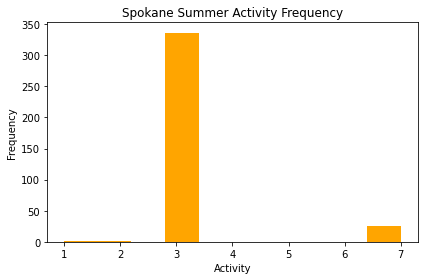

In [661]:
import matplotlib.pyplot as plt

# labels
#plt.xticks(rotation=45, ha="right") # ha: horizontal alignment
plt.title("Spokane Summer Activity Frequency")
plt.xlabel("Activity")
plt.ylabel("Frequency")

# plot 
plt.hist(summer_df["Activity"], color="orange")
plt.tight_layout()
plt.show()

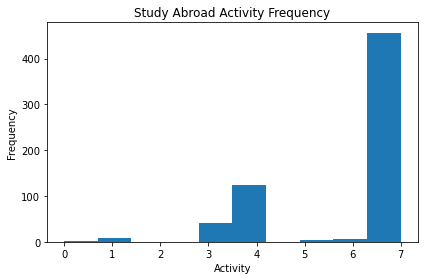

In [662]:
# new figure
plt.figure()

# labels
#plt.xticks(rotation=45, ha="right") # ha: horizontal alignment
plt.title("Study Abroad Activity Frequency")
plt.xlabel("Activity")
plt.ylabel("Frequency")

# plot 
plt.hist(study_abroad_df["Activity"])

plt.tight_layout()
plt.show()



Here are the formulas I will be using (independent, one tailed):
###### $$t = \frac{\overline{X}_{1} - \overline{X}_{2}}{\sqrt{S_{p}{2}(\frac{1}{n_{1}} + \frac{1}{n_{2}})}}$$

###### $$S_{p}^{2} = \frac{(n_{1} - 1)s_{1}^{2} + (n_{2} - 1)s_{2}^{2}}{n_{1} + n_{2} - 2}$$  
df = n1 + n2 - 2  
Lets find the degrees of freedom.

In [663]:

df = 1003
print("Degrees of freedom is", df)

Degrees of freedom is 1003


In Bus = 1, In Ferry = 2, In Passenger Vehicle = 3, In Subway = 4, In Train = 5, Unknown = 6, Walking = 7

**Step 1: Identify $H_{0}$ and $H_1$**  
$H_{0}$ : $\mu_{ActivitySpain} \leq \mu_{ActivitySpokane}$   
$H_1$  : $\mu_{ActivitySpain} > \mu_{ActivitySpokane}$

**Step 2: Select Level of Significance**  
$\alpha$ = 0.05, meaning there is a 5% chance of making an error when rejecting the null hypothesis

In [664]:
alpha = 0.05

**Step 3: Select appropriate test statistic**  
for a one tailed, two sample independent t-test with $\alpha$ value 0.05 and df = 1003.
using a t-chart, t is about 1.6469.

**Step 4: formulate the _decision rule_**

If $t_{computed} \leq$ 1.6469, do not reject $H_{0}$-->The population mean activity type in Spain is less than or equal to the population mean activity type in Spokane.  
If $t_{computed} >$ 1.6469, reject $H_{0}$-->The population mean activity type in Spain is greater than the population mean activity type in Spokane.

**Step 5: Make a Decision**  
* find $t_{computed}$

* apply decision rule

In [665]:
# get t and pvalue
t_comp, p_val = stats.ttest_ind(study_abroad_df["Activity"], summer_df["Activity"])
p_val/=2
print("T is", f"{t_comp:.4f}", ", and p-value is", f"{p_val:.4f}")

# apply decision rule by testing pvalue
if(p_val < alpha):
     print("Reject H0. The population mean activity type in Spain is greater than the population mean activity type in Spokane.")
else:
    print("Do not reject H0. The population mean distance of activity segments in Spain is greater than or equal to the population mean distance of activity segments in Spokane.")

T is 29.9115 , and p-value is 0.0000
Reject H0. The population mean activity type in Spain is greater than the population mean activity type in Spokane.


Next I will see if the mean distance travelled in Spain was longer when the average temp was higher. NOTE: I used Madrid weather data for the entire period, so it may not be totally accurate. Unfortnatel I ran into a lot of issues with the MeteoStat API. Here is a visualization of average temp vs distance:

Date
2022-01-21    0
2022-01-22    0
2022-01-23    0
2022-01-24    0
2022-01-25    0
             ..
2022-05-01    0
2022-05-02    0
2022-05-03    0
2022-05-04    0
2022-05-05    0
Length: 104, dtype: int64


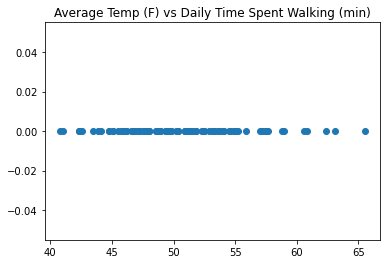

In [666]:
grouped_by_date = merged_df.groupby("Date")

#daily_act = grouped_by_date["Activity"].value_counts()

#grouped_by_act = merged_df.groupby("Activity")
#walking_ser = grouped_by_act.get_group("WALKING")
#walking_ser.index = walking_ser["Date"]
# time_walking = pd.Series(merged_df["Time Elapsed (min)"])
# time_walking.index = merged_df["Date"]
# print(time_walking)
daily_walking_sum = (merged_df["Activity"] == "WALKING")
#print(daily_walking_sum)

walking_time = []
for i in range(merged_df["Activity"].size):
    if(merged_df["Activity"].iloc[i] == "WALKING"):
        walking_time.append(merged_df["Time Elapsed (min)"].iloc[i])
    else:
        walking_time.append(0)
walking_time_ser = pd.Series(walking_time)
walking_time_ser.index = merged_df["Date"]
#print(walking_time_ser)

walking_time_ser_sum = walking_time_ser.groupby("Date").sum()
print(walking_time_ser_sum)

daily_avg_temp_ser = pd.Series(merged_df["Avg Temp"])
daily_avg_temp_ser.index = merged_df["Date"]
#print(daily_avg_temp_ser)

daily_avg_mean_temp = daily_avg_temp_ser.groupby("Date").mean()
#print(daily_avg_mean_temp)

# temp_df = daily_avg_mean_temp.to_frame()

# walking_df = daily_walking_sum.to_frame()
# temp_walking_df = walking_df.merge(temp_df, how="outer", on="Date")

plt.figure()

#labels
plt.title("Average Temp (F) vs Daily Time Spent Walking (min)")

#plot
plt.scatter(daily_avg_mean_temp, walking_time_ser_sum)
plt.show()
#

Testing to see if the avg distance is greater in the second half rather than first. 

In [667]:
first_half = study_abroad_df.iloc[0:322]
second_half = study_abroad_df[332:643]
print(first_half["Distance (m)"].mean())
print(second_half["Distance (m)"].mean())

6396.95652173913
11565.729032258065


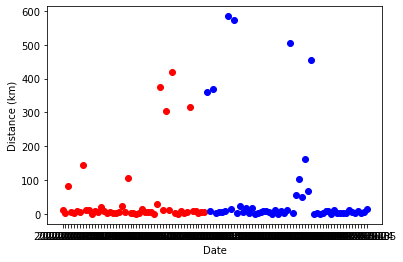

In [668]:
daily_total_distance_first= first_half.groupby("Date")["Distance (m)"].sum()
daily_total_distance_first /= 1000

daily_total_distance_last= second_half.groupby("Date")["Distance (m)"].sum()
daily_total_distance_last /= 1000

plt.figure()

#labels
plt.title("")
plt.xlabel("Date")
plt.ylabel("Distance (km)")

#plot
plt.scatter(daily_total_distance_first.index, daily_total_distance_first, color="red")
plt.scatter(daily_total_distance_last.index, daily_total_distance_last, color="blue")
plt.show()

is mean time spent on activity segments dependent on temp?

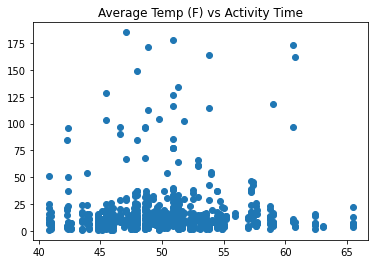

In [669]:
plt.figure()

#labels
plt.title("Average Temp (F) vs Activity Time")

#plot
plt.scatter(merged_df["Avg Temp"], study_abroad_df["Time Elapsed (min)"])
plt.show()

first vs second half time spent

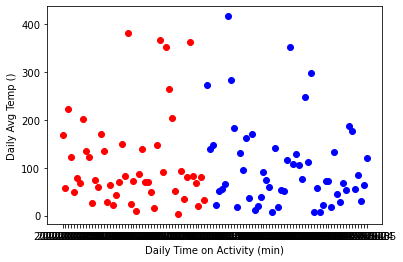

In [670]:
daily_total_time_first= first_half.groupby("Date")["Time Elapsed (min)"].sum()


daily_total_time_last= second_half.groupby("Date")["Time Elapsed (min)"].sum()


plt.figure()

#labels
plt.title("")
plt.xlabel("Daily Time on Activity (min)")
plt.ylabel("Daily Avg Temp ()")

#plot
plt.scatter(daily_total_time_first.index, daily_total_time_first, color="red")
plt.scatter(daily_total_time_last.index, daily_total_time_last, color="blue")
plt.show()

avg time spain vs spokane

In [671]:
print(study_abroad_df["Time Elapsed (min)"].mean())
print(summer_df["Time Elapsed (min)"].mean())

17.53719093977153
19.760190955004596


Weekday vs Weekend (stdy abd)

In [672]:
weekend_lst = []
for i in range(study_abroad_df["Activity"].size):
    if(study_abroad_df["Day of Week"].iloc[i] == "Friday" or study_abroad_df["Day of Week"].iloc[i] == "Saturday" or study_abroad_df["Day of Week"].iloc[i] == "Sunday"):
        weekend_lst.append(True)
    else:
        weekend_lst.append(False)

study_abroad_df.insert(value=weekend_lst, column="Weekend", loc=2)



In [673]:
grouped_by_weekend = merged_df.groupby("Weekend")

weekend_distance = grouped_by_weekend.get_group(True)["Distance (m)"]
weekday_distance = grouped_by_weekend.get_group(False)["Distance (m)"]

print(weekday_distance.mean())
print(weekend_distance.mean())

KeyError: 'Weekend'

In [ ]:

# unique_act_weekend = grouped_by_weekend["Activity"].unique()
# print(unique_act_weekend)
#unique_act_weekday = grouped_by_weekend.get_group(False)["Activity"].unique()

# unique_act_amt_lst_weekend = []
# for lst in unique_act_weekend:
#     unique_act_amt_lst_weekend.append(len(lst))

# unique_act_amt_ser = pd.Series(unique_act_amt_lst_weekend)
# unique_act_amt_ser

##### Group By Date  
for num unique activities per day, total/mean distance per day, total/mean time per day, also distance from house

In [ ]:
home_lat_lon = (40.40697741745367, -3.7051297000351493)

grouped_by_date = study_abroad_df.groupby("Date")
unique_act_ser = grouped_by_date["Activity"].unique()

unique_act_amt_lst = []

for lst in unique_act_ser:
    unique_act_amt_lst.append(len(lst))

unique_act_amt_ser = pd.Series(unique_act_amt_lst, index=unique_act_ser.index)
unique_act_amt_ser


Date
2022-01-21    2
2022-01-22    1
2022-01-23    4
2022-01-24    1
2022-01-25    2
             ..
2022-05-01    1
2022-05-02    2
2022-05-03    1
2022-05-04    1
2022-05-05    2
Length: 104, dtype: int64

## 3. Machine Learning  
In this section I will classify the data using the kNN algorithm and a Decision Tree Classiie.

In [ ]:
X = study_abroad_df.drop("Weekend", axis=1)
y = study_abroad_df["Weekend"]

Take away uninformative cols

In [ ]:
X.drop("Date", axis=1, inplace=True)
X.drop("Start Timestamp", axis=1, inplace=True)
X.drop("End Timestamp", axis=1, inplace=True)
X.drop("Day of Week", axis=1, inplace=True)
X.dropna(axis=1, inplace=True)
X

,Time Elapsed (min),Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
0,7.374850,40.4072887,-3.7037391,40.4118401,-3.7052917,634,7
1,24.522117,40.4124269,-3.7045765,40.4083941,-3.6930145,1289,7
2,50.843183,40.4095404,-3.6928230,40.4181546,-3.7046289,2670,7
3,11.013783,40.4167013,-3.7044784,40.4185364,-3.7098021,607,7
4,8.123917,40.4163340,-3.7087356,40.4161470,-3.7032274,499,7
...,...,...,...,...,...,...,...
637,2.057867,40.4182319,-3.7095123,40.4202932,-3.7059859,376,4
638,11.905133,40.4203902,-3.7063509,40.4069457,-3.7037075,2149,4
639,13.267133,40.4066533,-3.7035654,40.4047651,-3.7023939,610,7
640,14.171500,40.4047651,-3.7023939,40.4262112,-3.7011621,2438,4


In [ ]:
#divide into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, stratify=y)


In [ ]:
# normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(n_neighbors=3, metric="euclidean")

knn_clf.fit(X_train, y_train)
y_predicted = knn_clf.predict(X_test)
#print(y_predicted)
acc = accuracy_score(y_test, y_predicted)
print("accuracy :", acc)

accuracy : 0.5838509316770186


In [ ]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train) # "train"
y_predicted = dt_clf.predict(X_test)
acc = accuracy_score(y_test, y_predicted)
#print(y_predicted)
print("accuracy :", acc)

#plot tree
#plt.figure(figsize=[20, 20])
#tree.plot_tree(dt_clf, feature_names=X.columns, class_names={True:"Weekend", False:"Weekday"}, filled=True)

accuracy : 0.7204968944099379
